# Hypothesis Testing: An Introduction

This notebook explains the concept of hypothesis testing step-by-step, using Python for implementation. We will explore a real-world example to solidify our understanding.

## What is Hypothesis Testing?

Hypothesis testing is a statistical method used to make decisions or inferences about a population based on sample data. It involves the following steps:

1. **State the null hypothesis H0**: This is the assumption that there is no significant difference or effect.
2. **State the alternative hypothesis H1**: This is what you aim to prove.
3. **Choose a test statistic**: This is a numerical summary of the sample that can be used to test the hypotheses.
4. **Calculate the p-value**: This is the probability of obtaining a result at least as extreme as the observed result, assuming the null hypothesis is true.
5. **Draw a conclusion**: Compare the p-value to a significance level (e.g., alpha = 0.05) to accept or reject H0.

## Example: Comparing Heights of Two Classes

We have height data from two classes:

| Class | Mean Height | Std Dev | Sample Size |
|-------|-------------|---------|-------------|
| C1    | 168 cm      | 2 cm    | 50          |
| C2    | 170 cm      | 2 cm    | 50          |

### Question
Is there a significant difference in the average heights of the two classes?

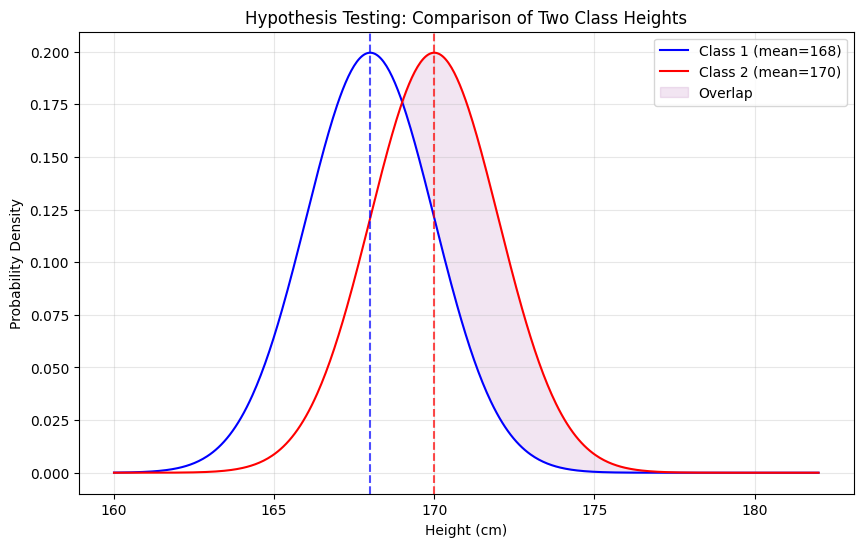

In [1]:
# Visualization of the height distributions
import matplotlib.pyplot as plt
import numpy as np

# Generate data
x = np.linspace(160, 182, 500)
mean_c1, std_c1 = 168, 2  # Class 1 parameters
mean_c2, std_c2 = 170, 2  # Class 2 parameters

pdf_c1 = (1 / (std_c1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_c1) / std_c1) ** 2)
pdf_c2 = (1 / (std_c2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_c2) / std_c2) ** 2)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_c1, label='Class 1 (mean=168)', color='blue')
plt.plot(x, pdf_c2, label='Class 2 (mean=170)', color='red')
plt.axvline(mean_c1, color='blue', linestyle='--', alpha=0.7)
plt.axvline(mean_c2, color='red', linestyle='--', alpha=0.7)
plt.fill_between(x, pdf_c1, pdf_c2, where=(pdf_c1 < pdf_c2), color='purple', alpha=0.1, label='Overlap')
plt.title('Hypothesis Testing: Comparison of Two Class Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Steps for Hypothesis Testing

1. Define H0: There is no difference in the mean heights of the two classes.
2. Define H1: There is a significant difference in the mean heights of the two classes.
3. Choose a test statistic: Use the t-test for independent samples.
4. Compute the p-value.
5. Compare the p-value with alpha = 0.05.

In [2]:
# Implementation of t-test
from scipy.stats import ttest_ind

# Sample data
np.random.seed(42)
class1_heights = np.random.normal(mean_c1, std_c1, 50)
class2_heights = np.random.normal(mean_c2, std_c2, 50)

# Perform t-test
t_stat, p_value = ttest_ind(class1_heights, class2_heights)
print(f'T-statistic: {t_stat:.3f}')
print(f'P-value: {p_value:.3f}')

# Conclusion
if p_value < 0.05:
    print('Reject the null hypothesis: There is a significant difference.')
else:
    print('Fail to reject the null hypothesis: No significant difference.')

T-statistic: -6.873
P-value: 0.000
Reject the null hypothesis: There is a significant difference.
